https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [12]:
import time

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from config import DATA_CSV, PIXEL_ARRAY, DTYPE, Y_LABEL
from config import FEATURES, OUTPUT_FOLDER, FORMAT
from preprocessing import to_arr

In [24]:
X = np.load(OUTPUT_FOLDER + 'hl.npy', allow_pickle=True)
X_arr = to_arr(X)

y = np.load(Y_LABEL)

print(X.shape)
print(y.shape)

/home/xunwei/anaconda3/envs/fyp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2131,)
(2131,)


In [26]:
df = pd.DataFrame({'data':X, 'y':y})

In [28]:
pca = PCA(n_components=600)
pca_result = pca.fit_transform(X_arr)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.17016582 0.0214391  0.01069607 0.00771836 0.00746928 0.00579201
 0.00573595 0.00563376 0.00513024 0.00494068 0.0045554  0.00446092
 0.00414234 0.00351744 0.00350644 0.00337716 0.00325128 0.00322473
 0.00317737 0.00312666 0.00308515 0.00300272 0.00293842 0.00285384
 0.00277786 0.00273031 0.00254729 0.00245934 0.00239767 0.00231566
 0.00226848 0.00216203 0.00207686 0.00205544 0.00201707 0.00200692
 0.00197508 0.0019406  0.00189665 0.00187118 0.00185874 0.00178344
 0.00175853 0.00169882 0.00168041 0.00164509 0.00159893 0.00159336
 0.00155943 0.00154569 0.00153071 0.00151146 0.00150838 0.00149808
 0.00148226 0.00146916 0.00146439 0.00146065 0.00144666 0.00143876
 0.00143025 0.00142182 0.00141654 0.0014083  0.00139322 0.0013785
 0.0013621  0.00135214 0.00134975 0.00133976 0.00132299 0.00132159
 0.00130328 0.0012888  0.00128367 0.00127481 0.00125599 0.00125207
 0.00124299 0.00123066 0.0012214  0.00121779 0.00121078 0.00120418
 0.00119374 0.0011

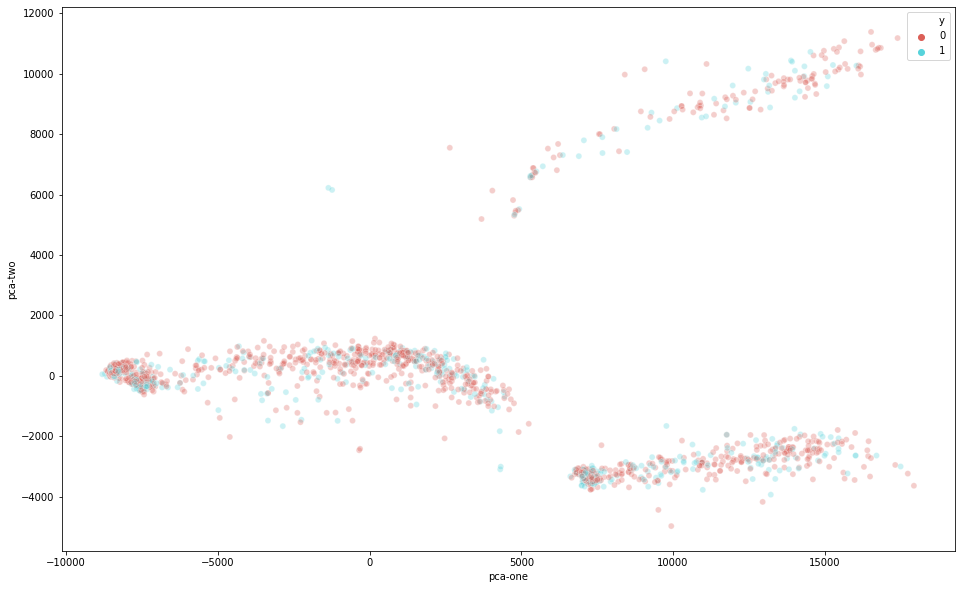

In [31]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)

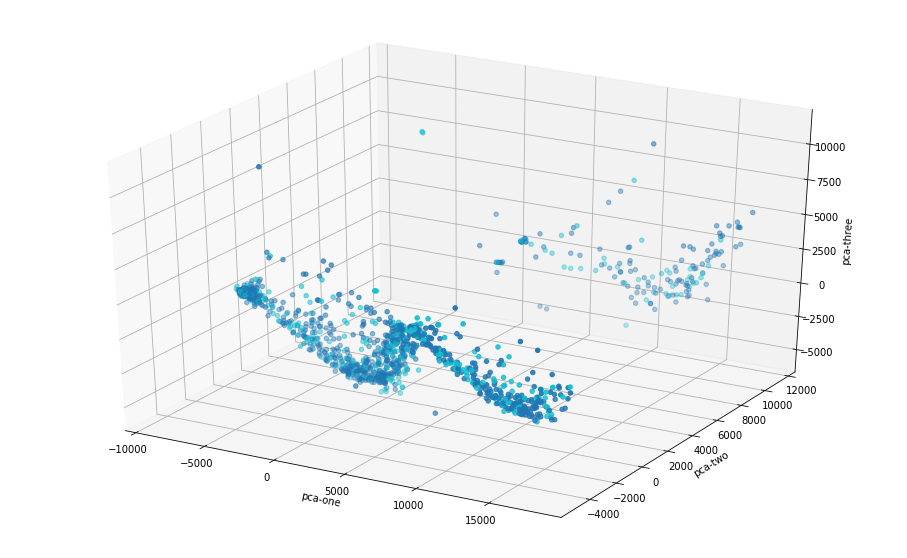

In [33]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()